# Weekly assignment week 4 & 5
###### Ilse de Roo
#### With Speed Dating Data Set from kaggle 

## Introduction
I have chosen for the data set Speed Dating Data, I'm interested to see if there are possibilities to find correlations and how strong these correlations are.
The selected variables are: ...
These variables were chosen ....

## Data cleaning


In [1]:
#import all functions that are probably needed
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import math
import sklearn as sk

from sklearn.linear_model import LinearRegression #all important of sk-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#import Speed Dating Data set (ssd= Speed Dating Data)
#sdd = pd.read_csv('SpeedDatingData.csv', sep=",")
#sdd.head()

#import csv
#with open('SpeedDatingData.csv', newline='', encoding='utf-8') as f:
#    reader = csv.reader(f)
#    for row in reader:
#        print(row)

sdd = pd.read_csv('SpeedDatingData.csv', encoding='cp1252')
sdd.head(20)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
list(sdd)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'positin1',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'amb_o',
 'shar_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'undergra',
 'mn_sat',
 'tuition',
 'race',
 'imprace',
 'imprelig',
 'from',
 'zipcode',
 'income',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'expnum',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 

In [4]:
df = sdd[['iid', 'id', 'gender', 'condtn', 'round', 'position', 'order', 'partner', 'match', 'age', 'field_cd', 'imprelig', 'goal', 'date', 'go_out']]
df.head()

#iid = 
#id = 
#gender = 
#condtn =
#round =
#position =
#oder = 
#partner = 
#match =
#age = 
#field_cd
#imprelig
#goal
#date
#go_out

,iid,id,gender,condtn,round,position,order,partner,match,age,field_cd,imprelig,goal,date,go_out
0,1,1.0,0,1,10,7,4,1,0,21.0,1.0,4.0,2.0,7.0,1.0
1,1,1.0,0,1,10,7,3,2,0,21.0,1.0,4.0,2.0,7.0,1.0
2,1,1.0,0,1,10,7,10,3,1,21.0,1.0,4.0,2.0,7.0,1.0
3,1,1.0,0,1,10,7,5,4,1,21.0,1.0,4.0,2.0,7.0,1.0
4,1,1.0,0,1,10,7,7,5,1,21.0,1.0,4.0,2.0,7.0,1.0


In [5]:
df.info() #Get information on the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid       8378 non-null   int64  
 1   id        8377 non-null   float64
 2   gender    8378 non-null   int64  
 3   condtn    8378 non-null   int64  
 4   round     8378 non-null   int64  
 5   position  8378 non-null   int64  
 6   order     8378 non-null   int64  
 7   partner   8378 non-null   int64  
 8   match     8378 non-null   int64  
 9   age       8283 non-null   float64
 10  field_cd  8296 non-null   float64
 11  imprelig  8299 non-null   float64
 12  goal      8299 non-null   float64
 13  date      8281 non-null   float64
 14  go_out    8299 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 981.9 KB


## Exploratory data analysis

In this part of the assignment we are exploraring the data

C:\Users\ilsed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


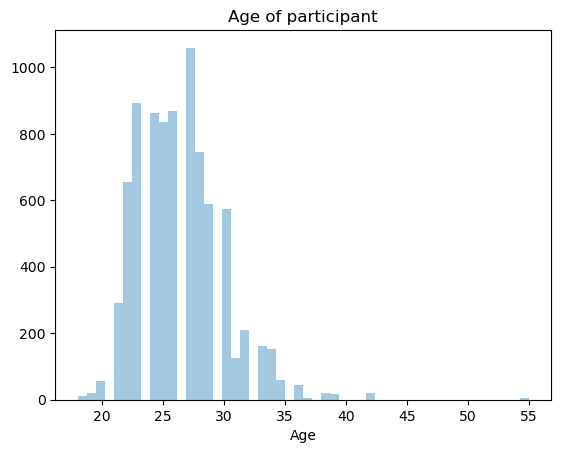

In [6]:
sns.distplot(df['age'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Age of participant')
plt.xlabel('Age')
plt.show()

The median importance of religion is: 3.0
The mean imprtance of religion is: 3.651644776479094


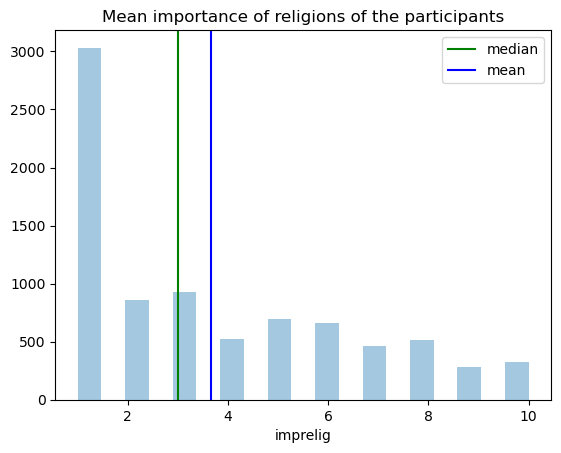

In [7]:
mean_relig = df['imprelig'].mean()
median_relig = df['imprelig'].median()

print(f'The median importance of religion is: {median_relig}')
print(f'The mean imprtance of religion is: {mean_relig}')

sns.distplot(df['imprelig'].dropna(), kde=False)
plt.title('Mean importance of religions of the participants')
plt.axvline(median_relig, 0, 10, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_relig, 0, 10, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because the labels are set in the previous lines
plt.show()

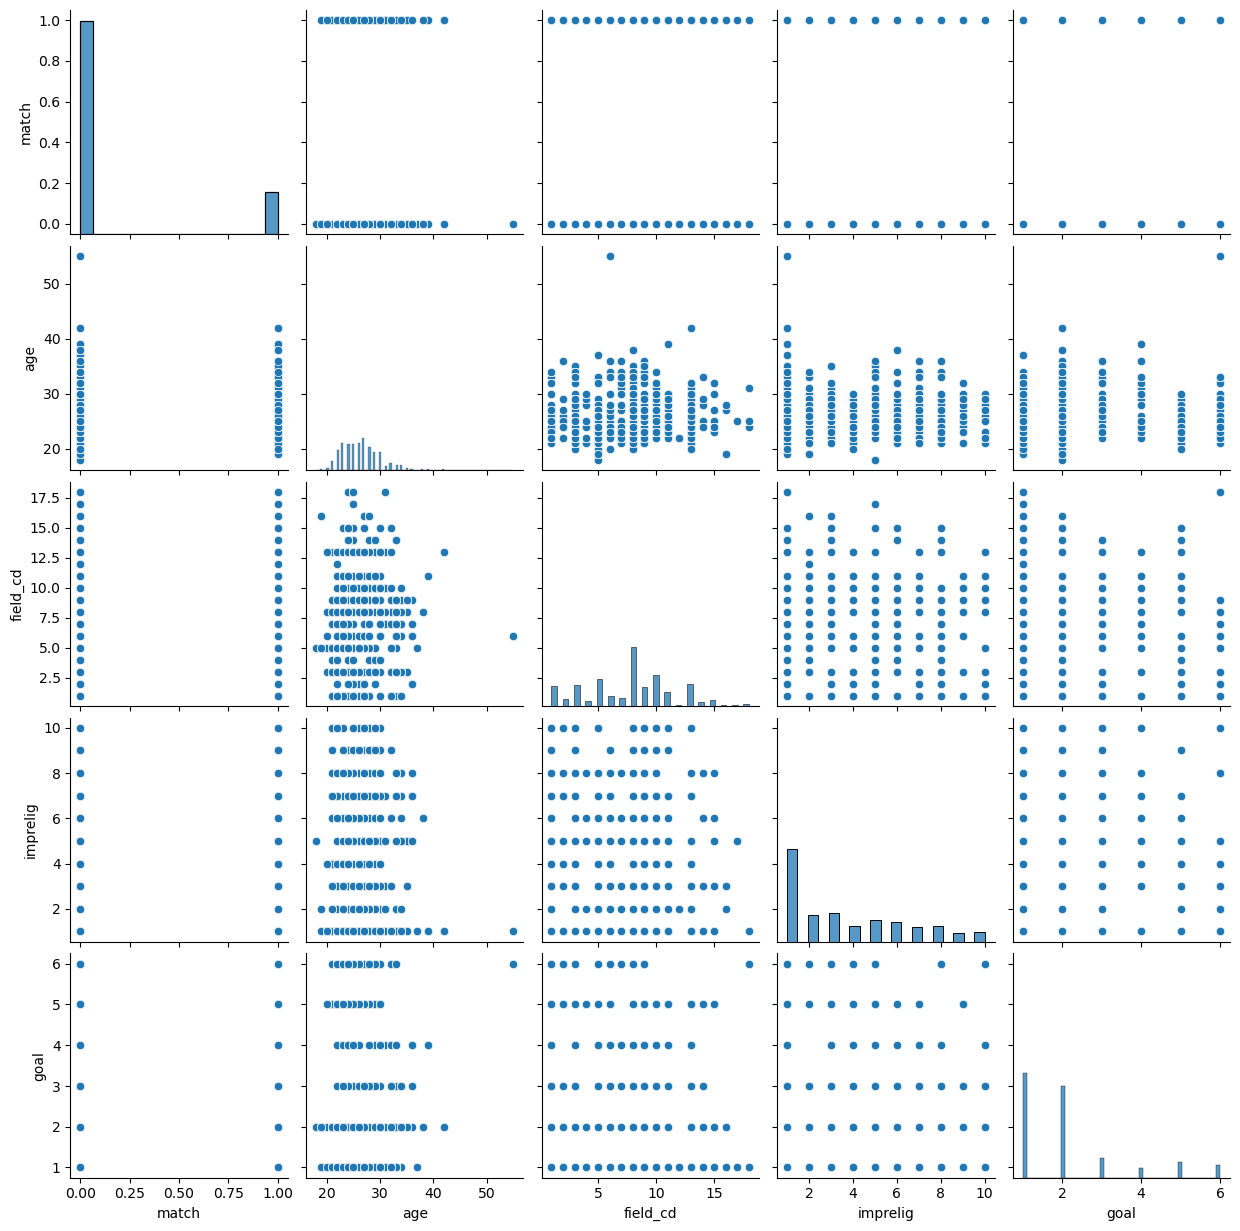

In [8]:
df2 = df[['match', 'age', 'field_cd', 'imprelig', 'goal']]
sns.pairplot(df2)
plt.show()

## Predictive model

In [9]:
df = df[['match', 'age', 'field_cd', 'imprelig', 'goal']]
df = df.dropna() #get rid of rows with empty cells

In [10]:
dummies = pd.get_dummies(df[['field_cd', 'imprelig', 'goal']])
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head()

,match,age,field_cd,imprelig,goal,field_cd,imprelig,goal
0,0,21.0,1.0,4.0,2.0,1.0,4.0,2.0
1,0,21.0,1.0,4.0,2.0,1.0,4.0,2.0
2,1,21.0,1.0,4.0,2.0,1.0,4.0,2.0
3,1,21.0,1.0,4.0,2.0,1.0,4.0,2.0
4,1,21.0,1.0,4.0,2.0,1.0,4.0,2.0


In [11]:
X = df[['age', 'field_cd', 'imprelig', 'goal']] #create the X matrix

y = df['match'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set


,age,field_cd,field_cd,imprelig,imprelig,goal,goal
3760,26.0,10.0,10.0,4.0,4.0,1.0,1.0
2200,22.0,10.0,10.0,2.0,2.0,2.0,2.0
6032,24.0,6.0,6.0,6.0,6.0,2.0,2.0
3782,29.0,3.0,3.0,10.0,10.0,6.0,6.0
196,24.0,8.0,8.0,1.0,1.0,1.0,1.0


In [12]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [13]:
knn.n_samples_fit_

5773

## Evaluation

In [17]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

C:\Users\ilsed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.812929292929293

In [18]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

C:\Users\ilsed\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[1959,   98],
       [ 365,   53]], dtype=int64)

In [16]:
print(y_test)

6771    0
5621    0
4198    0
5473    0
6572    1
       ..
1231    0
2809    0
5523    0
7979    0
5110    0
Name: match, Length: 2475, dtype: int64


81% of the match predictions are accurate

In [20]:
knn.classes_

array([0, 1], dtype=int64)

In [21]:
conf_matrix = pd.DataFrame(cm, index=['No Match (actual)', 'Match (actual)'], columns = ['No Match (predicted)', 'Match (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,No Match (predicted),Match (predicted)
No Match (actual),1959,98
Match (actual),365,53


In [24]:
precisionM = 53/(98+53)
print(precisionM)

0.3509933774834437


In [23]:
precisionNM = 1959/(1959+365)
print(precisionNM)

0.8429432013769363


In [25]:
recallM = 53/(53+365)
print(recallM)

0.12679425837320574


In [27]:
recallNM = 1959/(1959+98)
print(recallNM)

0.9523578026251823
